<a href="https://colab.research.google.com/github/usamaqureshi27/Bellabeat-Data-Analysis/blob/main/Bellabeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('ggplot')

from google.colab import files
from google.colab import drive


# pd.set_option('max_column')

In [5]:
# To upload data from local file system

uploaded = files.upload()

Saving dailyActivity_merged.csv to dailyActivity_merged (1).csv


In [6]:
import io
df = pd.read_csv('dailyActivity_merged.csv')

In [7]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [8]:
# To insert data from google drive
# mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [10]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [11]:
df.shape

(940, 15)

In [12]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

# Cleaning and Propessing the Data

In [13]:
# clean the data
df['Id'] = df['Id'].astype(str)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format= "%m/%d/%Y")


In [14]:
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [15]:
# To check whether the total distance and tracker distance are same
df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']
df['distance_diff'].value_counts()

0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: distance_diff, dtype: int64

In [16]:
df.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


So, total ditance and tracker distance are not having the same information

In [17]:
# Transform columns name into lower case

df.columns = df.columns.str.lower()
df.columns


Index(['id', 'activitydate', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories',
       'distance_diff'],
      dtype='object')

In [18]:
df.head()

,id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,distance_diff
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,0.0


In [19]:
# separate words using underscore _

df.rename(columns = {'activitydate' : 'activity_date', 'totalsteps' : 'total_steps', 'totaldistance' : 'total_distance', 'trackerdistance' : 'tracker_distance',
       'loggedactivitiesdistance' :  'logged_activities_distance', 'veryactivedistance' : 'very_active_distance',
       'moderatelyactivedistance' :  'moderately_active_distance', 'lightactivedistance' : 'light_active_distance',
       'sedentaryactivedistance' : 'sedentary_active_distance', 'veryactiveminutes' :  'very_active_minutes', 'fairlyactiveminutes' : 'fairly_active_minutes',
       'lightlyactiveminutes' : 'lightly_active_minutes', 'sedentaryminutes' : 'sedentary_minutes'}, inplace = False)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,0.0
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,0.0
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,0.0
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,0.0
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,0.0
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,0.0
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,0.0
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,0.0


In [20]:
df.rename(columns = {'activitydate' : 'activity_date', 'totalsteps' : 'total_steps', 'totaldistance' : 'total_distance', 'trackerdistance' : 'tracker_distance',
       'loggedactivitiesdistance' :  'logged_activities_distance', 'veryactivedistance' : 'very_active_distance',
       'moderatelyactivedistance' :  'moderately_active_distance', 'lightactivedistance' : 'light_active_distance',
       'sedentaryactivedistance' : 'sedentary_active_distance', 'veryactiveminutes' :  'very_active_minutes', 'fairlyactiveminutes' : 'fairly_active_minutes',
       'lightlyactiveminutes' : 'lightly_active_minutes', 'sedentaryminutes' : 'sedentary_minutes'}, inplace = True)

In [21]:
df.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'distance_diff'],
      dtype='object')

In [22]:
# create a column having day of week
df['day_of_week'] = df['activity_date'].dt.day_name()


In [23]:
# create a column having number of day of week
df['n_day_of_week'] = df['activity_date'].dt.weekday   #0 will be Monday, 6 will be sunday


In [24]:
df.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,0.0,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,0.0,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,0.0,Thursday,3
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,0.0,Friday,4
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,0.0,Saturday,5


In [25]:
# checking duplicates
df.duplicated().sum()

0

In [26]:
# checking null values

df.isnull().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [27]:
# Distance columns are having no units. But total steps number is giving a corelation, so we subset a data to a new version without distance information.

df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       #'tracker_distance', #'logged_activities_distance',
       #'very_active_distance', 'moderately_active_distance',
       #'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       #'distance_diff',
             'day_of_week', 'n_day_of_week']].copy()

In [28]:
df.head()

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday,1
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday,2
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday,3
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday,4
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Saturday,5


# Analysis Approach

## Categories of Users


### 1.Based upon steps
#### Sedentary: less than 6000 on average
#### Active: between 6000 and 12000 on average
#### Very Active: more than 12000 on average

In [29]:
df['id'].unique()

array(['1503960366', '1624580081', '1644430081', '1844505072',
       '1927972279', '2022484408', '2026352035', '2320127002',
       '2347167796', '2873212765', '3372868164', '3977333714',
       '4020332650', '4057192912', '4319703577', '4388161847',
       '4445114986', '4558609924', '4702921684', '5553957443',
       '5577150313', '6117666160', '6290855005', '6775888955',
       '6962181067', '7007744171', '7086361926', '8053475328',
       '8253242879', '8378563200', '8583815059', '8792009665',
       '8877689391'], dtype=object)

In [30]:
df['id'].nunique()

33

In [31]:
df['activity_date'].value_counts()

2016-04-12    33
2016-04-14    33
2016-04-15    33
2016-04-13    33
2016-04-23    32
2016-04-29    32
2016-04-28    32
2016-04-26    32
2016-04-25    32
2016-04-24    32
2016-04-27    32
2016-04-22    32
2016-04-20    32
2016-04-19    32
2016-04-18    32
2016-04-17    32
2016-04-16    32
2016-04-21    32
2016-04-30    31
2016-05-01    30
2016-05-05    29
2016-05-07    29
2016-05-06    29
2016-05-03    29
2016-05-04    29
2016-05-02    29
2016-05-08    27
2016-05-09    27
2016-05-10    26
2016-05-11    24
2016-05-12    21
Name: activity_date, dtype: int64

In [32]:
df['activity_date'].nunique()

31

In [33]:
# creating average steps of each user
id_grp = df.groupby(['id'])
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending = False)
id_avg_step = id_avg_step.to_frame()

id_avg_step

,total_steps
id,
8877689391,16040.032258
8053475328,14763.290323
1503960366,12116.741935
2022484408,11370.645161
7007744171,11323.423077
3977333714,10984.566667
4388161847,10813.935484
6962181067,9794.806452
2347167796,9519.666667


In [34]:
# categorize average steps in our defined groups
conditions = [(id_avg_step <= 6000), (id_avg_step > 6000) & (id_avg_step < 12000), (id_avg_step >= 12000)]
values = ['sedentary' , 'active' , 'very_active']

id_avg_step['activity_level'] = np.select(conditions, values)

In [35]:

# creating a variable having activity level of each user
id_activity_level = id_avg_step['activity_level']
id_activity_level

id
8877689391    very_active
8053475328    very_active
1503960366    very_active
2022484408         active
7007744171         active
3977333714         active
4388161847         active
6962181067         active
2347167796         active
7086361926         active
8378563200         active
5553957443         active
4702921684         active
5577150313         active
4558609924         active
2873212765         active
1644430081         active
4319703577         active
8583815059         active
6117666160         active
3372868164         active
8253242879         active
1624580081      sedentary
6290855005      sedentary
2026352035      sedentary
4445114986      sedentary
2320127002      sedentary
4057192912      sedentary
1844505072      sedentary
6775888955      sedentary
4020332650      sedentary
8792009665      sedentary
1927972279      sedentary
Name: activity_level, dtype: object

In [36]:
# creating a column of activity level into our main dataset
df['activity_level'] = [id_activity_level[c] for c in df['id']]

In [37]:
df.head(10)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week,activity_level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday,1,very_active
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday,2,very_active
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday,3,very_active
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday,4,very_active
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Saturday,5,very_active
5,1503960366,2016-04-17,9705,6.48,38,20,164,539,1728,Sunday,6,very_active
6,1503960366,2016-04-18,13019,8.59,42,16,233,1149,1921,Monday,0,very_active
7,1503960366,2016-04-19,15506,9.88,50,31,264,775,2035,Tuesday,1,very_active
8,1503960366,2016-04-20,10544,6.68,28,12,205,818,1786,Wednesday,2,very_active
9,1503960366,2016-04-21,9819,6.34,19,8,211,838,1775,Thursday,3,very_active


### 2. Based upon devise use
#### Low use: less than 8 hours per day
#### Normal use: between 8 and 16 hours per day
#### High use: more than 16 and up to 24 hours per day

In [38]:
# grouping up minutes accroding to each individual/user
id_mints_grp = id_grp['very_active_minutes',	'fairly_active_minutes',	'lightly_active_minutes',	'sedentary_minutes'].sum()
id_mints_grp

<ipython-input-38-aa6a045fffab>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  id_mints_grp = id_grp['very_active_minutes',	'fairly_active_minutes',	'lightly_active_minutes',	'sedentary_minutes'].sum()


,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes
id,,,,
1503960366,1200,594,6818,26293
1624580081,269,180,4758,38990
1644430081,287,641,5354,34856
1844505072,4,40,3579,37405
1927972279,41,24,1196,40840
2022484408,1125,600,7981,34490
2026352035,3,8,7956,21372
2320127002,42,80,6144,37823
2347167796,243,370,4545,12369


In [39]:
# summing up all types of minutes accroding to each individual/user
id_mints_grp ['sum_minutes'] = id_mints_grp [['very_active_minutes',	'fairly_active_minutes',	'lightly_active_minutes',	'sedentary_minutes']].sum(axis =1)
id_mints_grp

,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,sum_minutes
id,,,,,
1503960366,1200,594,6818,26293,34905
1624580081,269,180,4758,38990,44197
1644430081,287,641,5354,34856,41138
1844505072,4,40,3579,37405,41028
1927972279,41,24,1196,40840,42101
2022484408,1125,600,7981,34490,44196
2026352035,3,8,7956,21372,29339
2320127002,42,80,6144,37823,44089
2347167796,243,370,4545,12369,17527


In [42]:
# converting minutes into hour
id_mints_grp ['total_hours'] = id_mints_grp['sum_minutes'] / 60
id_mints_grp

,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,sum_minutes,total_hours
id,,,,,,
1503960366,1200,594,6818,26293,34905,581.750000
1624580081,269,180,4758,38990,44197,736.616667
1644430081,287,641,5354,34856,41138,685.633333
1844505072,4,40,3579,37405,41028,683.800000
1927972279,41,24,1196,40840,42101,701.683333
2022484408,1125,600,7981,34490,44196,736.600000
2026352035,3,8,7956,21372,29339,488.983333
2320127002,42,80,6144,37823,44089,734.816667
2347167796,243,370,4545,12369,17527,292.116667


In [50]:
# creating new column of average hours per day
id_mints_grp['total_hours_per_day'] = id_mints_grp['total_hours'] / 31
id_mints_grp

,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,sum_minutes,total_hours,total_hours_per_day
id,,,,,,,
1503960366,1200,594,6818,26293,34905,581.750000,18.766129
1624580081,269,180,4758,38990,44197,736.616667,23.761828
1644430081,287,641,5354,34856,41138,685.633333,22.117204
1844505072,4,40,3579,37405,41028,683.800000,22.058065
1927972279,41,24,1196,40840,42101,701.683333,22.634946
2022484408,1125,600,7981,34490,44196,736.600000,23.761290
2026352035,3,8,7956,21372,29339,488.983333,15.773656
2320127002,42,80,6144,37823,44089,734.816667,23.703763
2347167796,243,370,4545,12369,17527,292.116667,9.423118


In [51]:
# categorize average hours in our defined groups
conditions = [(id_mints_grp['total_hours_per_day'] <= 8), (id_mints_grp['total_hours_per_day'] > 8) & (id_mints_grp['total_hours_per_day'] < 16), (id_mints_grp['total_hours_per_day'] >= 16)]
values = ['Low use' , 'Normal use' , 'High use']

id_mints_grp['usage_level'] = np.select(conditions, values)

In [52]:
# Creating a variable having usage level of each user
id_usage_level = id_mints_grp['usage_level']
id_usage_level

id
1503960366      High use
1624580081      High use
1644430081      High use
1844505072      High use
1927972279      High use
2022484408      High use
2026352035    Normal use
2320127002      High use
2347167796    Normal use
2873212765      High use
3372868164    Normal use
3977333714    Normal use
4020332650      High use
4057192912       Low use
4319703577      High use
4388161847      High use
4445114986      High use
4558609924      High use
4702921684      High use
5553957443    Normal use
5577150313      High use
6117666160      High use
6290855005      High use
6775888955      High use
6962181067    Normal use
7007744171      High use
7086361926      High use
8053475328      High use
8253242879    Normal use
8378563200    Normal use
8583815059      High use
8792009665      High use
8877689391      High use
Name: usage_level, dtype: object

In [53]:
# Creating a column of usage level into our main dataset
df['usage_level'] = [id_usage_level[c] for c in df['id']]

In [54]:
df.head(10)

,id,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,day_of_week,n_day_of_week,activity_level,usage_level
0,1503960366,2016-04-12,13162,8.50,25,13,328,728,1985,Tuesday,1,very_active,High use
1,1503960366,2016-04-13,10735,6.97,21,19,217,776,1797,Wednesday,2,very_active,High use
2,1503960366,2016-04-14,10460,6.74,30,11,181,1218,1776,Thursday,3,very_active,High use
3,1503960366,2016-04-15,9762,6.28,29,34,209,726,1745,Friday,4,very_active,High use
4,1503960366,2016-04-16,12669,8.16,36,10,221,773,1863,Saturday,5,very_active,High use
5,1503960366,2016-04-17,9705,6.48,38,20,164,539,1728,Sunday,6,very_active,High use
6,1503960366,2016-04-18,13019,8.59,42,16,233,1149,1921,Monday,0,very_active,High use
7,1503960366,2016-04-19,15506,9.88,50,31,264,775,2035,Tuesday,1,very_active,High use
8,1503960366,2016-04-20,10544,6.68,28,12,205,818,1786,Wednesday,2,very_active,High use
9,1503960366,2016-04-21,9819,6.34,19,8,211,838,1775,Thursday,3,very_active,High use


## Visualization


Text(0.5, 1.0, 'Correlation between calories vs steps')

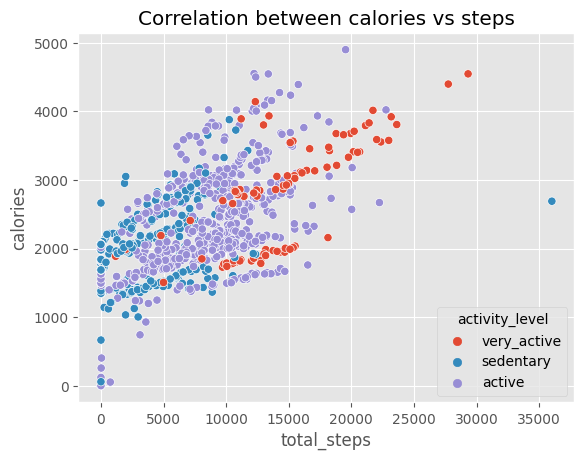

In [55]:
# correlation between total steps and calories
sns.scatterplot( x = 'total_steps' , y = 'calories' , data = df , hue = df['activity_level'] )
plt.title('Correlation between calories vs steps')
# plt.tight_layout()

<BarContainer object of 7 artists>

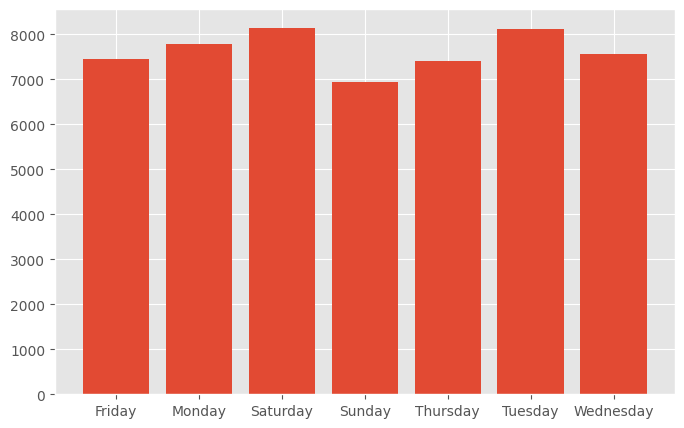

In [56]:
# average steps per day

day_grp = df.groupby(['day_of_week'])
avg_daily_steps = day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.figure(figsize = (8,5))
plt.bar(avg_daily_steps.index , avg_daily_steps)

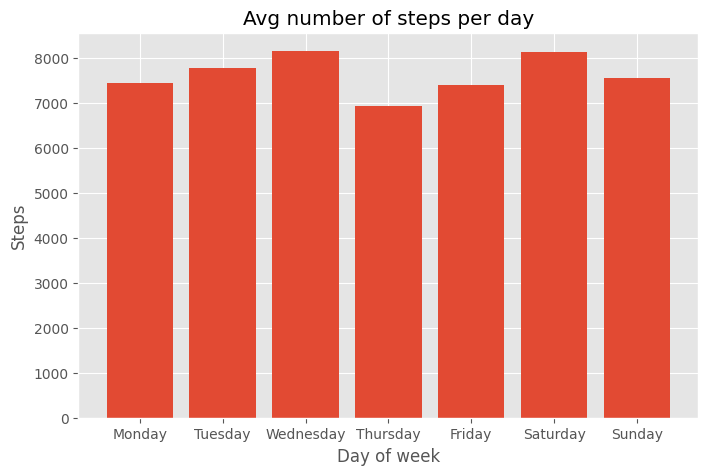

In [57]:
# to arrange the order of days of week from alphabetical order

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(1,1,figsize = (8,5))

plt.bar(avg_daily_steps.index , avg_daily_steps)

ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)

ax.set_ylabel('Steps')
ax.set_xlabel('Day of week')
ax.set_title('Avg number of steps per day')
plt.show()

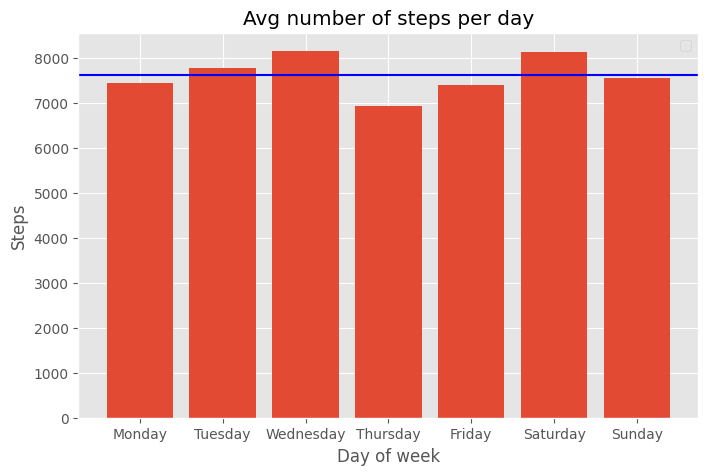

In [59]:
# to show the average line

fig, ax = plt.subplots(1,1,figsize = (8,5))

plt.bar(avg_daily_steps.index , avg_daily_steps)
ax.set_xticks(range(len(day_order)))
ax.set_xticklabels(day_order)
ax.axhline(y = avg_daily_steps.mean() , color = 'blue')

ax.set_ylabel('Steps')
ax.set_xlabel('Day of week')
ax.set_title('Avg number of steps per day')
plt.legend()
plt.show()

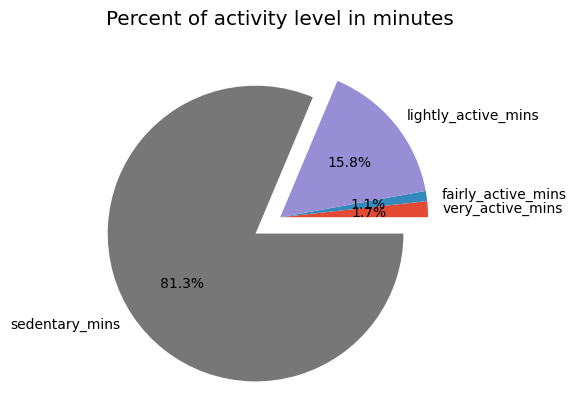

In [64]:
# percentage of activity in minutes

very_active_mins = df['very_active_minutes'].sum()
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]

labels = ['very_active_mins', 'fairly_active_mins', 'lightly_active_mins', 'sedentary_mins']

explode = [0,0,0,0.2]

plt.pie(slices, labels = labels, explode = explode, autopct= '%1.1f%%')

plt.title('Percent of activity level in minutes')

plt.show()

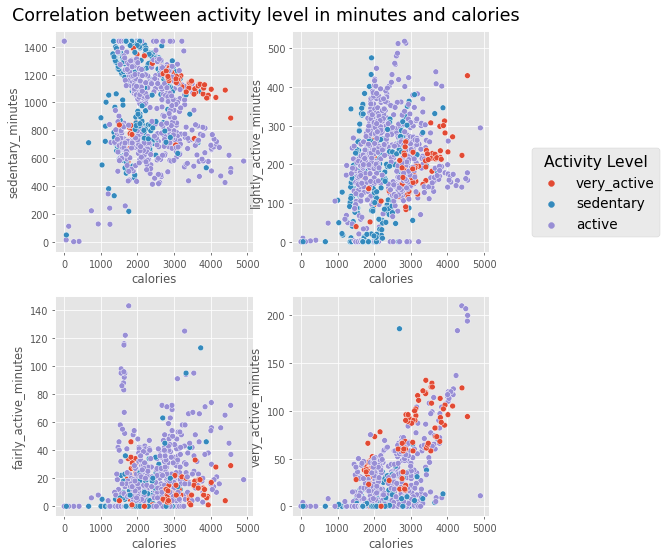

In [61]:
# correlation between activity level in minutes and calories

n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,9), dpi = 70)

sns.scatterplot(data = df, x = 'calories' , y = 'sedentary_minutes' , hue ='activity_level' , ax = axes[0,0] , legend = False)
sns.scatterplot(data = df, x = 'calories' , y = 'lightly_active_minutes' , hue ='activity_level' , ax = axes[0,1] , legend = False)
sns.scatterplot(data = df, x = 'calories' , y = 'fairly_active_minutes' , hue ='activity_level' , ax = axes[1,0] , legend = False)
sns.scatterplot(data = df, x = 'calories' , y = 'very_active_minutes' , hue ='activity_level' , ax = axes[1,1] , legend = True)

plt.legend(title = 'Activity Level' , fontsize = 14 , title_fontsize = 16 ,  bbox_to_anchor = (1.9 , 1.7))

fig.suptitle('Correlation between activity level in minutes and calories', x = 0.5, y=0.92, fontsize = 18)

plt.show()

1. Figue [0,0] shows there is no specific relation between burned calories with time in sedentary.
2. Figue [0,1] shows positive correlation, for very active person, more time spend on light activity the more calories are burned.
3. Figue [1,0] shows there is no specific relation between burned calories with fairly activity time.
4. Figue [1,1] shows positive correlation, for very active person, more time spend on large scale activity the more calories are burned.